# Insights into Melbourne's Housing Market: Using Machine Learning to Forecast Property Prices

In [35]:
import pandas as pd

In [36]:
# Save filepath in variable
melb_file = '../data/melb_data.csv'

In [37]:
# Read file into a variable
melb_data = pd.read_csv(melb_file)

In [38]:
melb_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


### Viewing information about the data to determine null values and data types

In [39]:
melb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

### Cleaning the Data

First, "Lattitude" and "Longtitude" columns should be renamed.

In [40]:
# Rename column names
new_column_names = {'Lattitude': 'Latitude', 'Longtitude': 'Longitude'}
melb_data = melb_data.rename(columns=new_column_names)

melb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Latitude       13580 non-null  float64
 18  Longit

In [41]:
# Store price in a variable as the prediction target
y = melb_data.Price
x = melb_data.drop('Price', axis=1)

In [42]:
x.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


### Analyzing Numerical Training Variables

I will perform correlation analysis to determine what variables have a strong relationship to price.

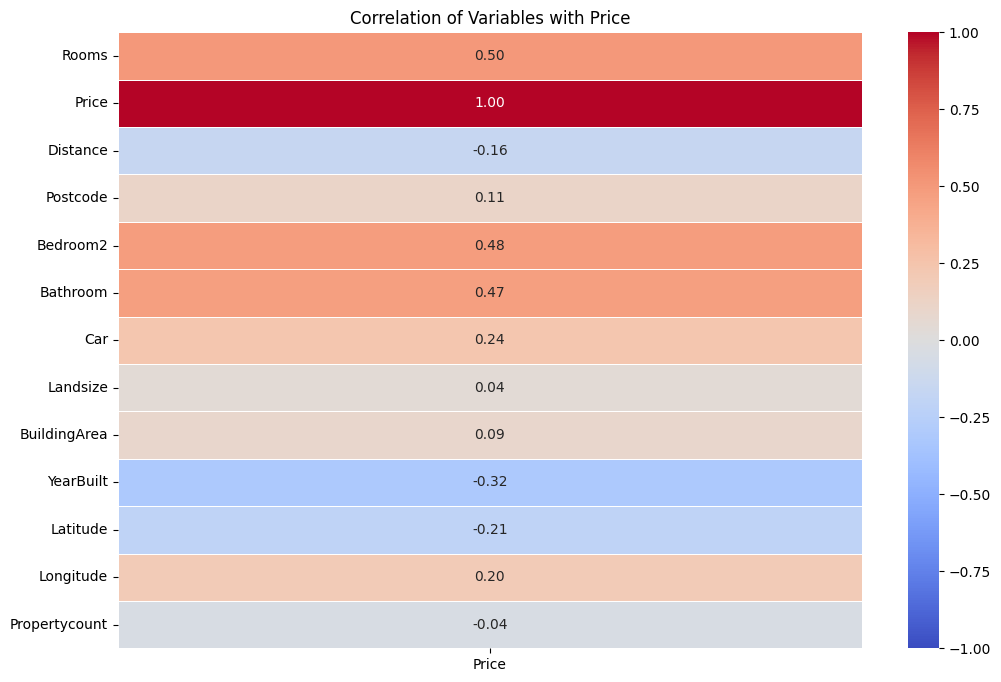

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
melb_df = melb_data.select_dtypes(include='number')

# Compute correlation of all variables to 'Price'
price_corr = round(melb_df.corr()['Price'], 2)

plt.figure(figsize=(12, 8))
sns.heatmap(price_corr.to_frame(), vmin=-1, vmax=1, center=0, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation of Variables with Price')
plt.show()

The correlation matrix above shows four variables with the strongest correlations:

- Rooms
- Bathroom
- Bedroom2

**Correlation coefficients** for these variables fall within a range of 0.47 to 0.5. These can be added to the training and validation data. We will also use Car, YearBuilt, Latitude and Longitude. Variables such as PropertyCount and Landsize have a low correlation but we will still include them in the data.

Next, categorical columns and numerical columns will be extracted so that we can replace missing values and use one-hot encoding for categorical variables.

In [44]:
# Extract numerical and categorical columns
num_melb_feats = [col for col in x.columns if x[col].dtype != 'object']
cat_melb_feats = [col for col in x.columns if x[col].dtype == 'object']

print("Categorical columns before: ", cat_melb_feats)

# Columns to drop for one hot encoding if the number of unique values is greater than 10 and type is object
cat_to_drop = [val for val in x.columns if len(x[val].unique()) > 10 and x[val].dtype == 'object']
cat_melb_feats = list(set(cat_melb_feats) - set(cat_to_drop))

print("Categorical columns after: ", cat_melb_feats)

Categorical columns before:  ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname']
Categorical columns after:  ['Type', 'Method', 'Regionname']


The categorical variables to be used are method (property sold prior, property passed in, etc.), region name and type (i.e. house).

### Preprocessing

The data will be split into training and validation sets. Null or missing values will be handled with imputation. One-hot encoding will be used for the categorical variables. A pipeline will be built for preprocessing.

In [45]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Split data into parts to be used for training and another for validation
train_x, val_x, train_y, val_y = train_test_split(x, y, train_size=0.8, random_state=1)

# Drop categorical columns with more than 10 unique values
train_x.drop(cat_to_drop, axis=1, inplace=True)

# Replace null numerical values with the mean
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

# Replace categorical values with most frequent value and then use one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps for all features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_melb_feats),
        ('cat', categorical_transformer, cat_melb_feats)
    ])

### Choosing a Model

We will use a **decision tree** to make predictions for house prices in Melbourne.

In [46]:
from sklearn.tree import DecisionTreeRegressor 

# Define model
aus_model = DecisionTreeRegressor(random_state=1)

# Bundle preprocessing and modeling code in a pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', aus_model)
                     ])

clf.fit(train_x, train_y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['Rooms', 'Distance',
                                                   'Postcode', 'Bedroom2',
                                                   'Bathroom', 'Car',
                                                   'Landsize', 'BuildingArea',
                                                   'YearBuilt', 'Latitude',
                                                   'Longitude',
                                                   'Propertycount']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Type', 'Method',
                                                   'Regionname'])])),
                ('model', DecisionTreeRegressor(random_state=1))])

In [47]:
print("Making predictions for the following 5 houses:")
print(val_x.head(5))

print("The predictions are")
print(clf.predict(val_x.head(5)))

Making predictions for the following 5 houses:
             Suburb              Address  Rooms Type Method        SellerG  \
321      Ascot Vale         7 Angler Pde      4    h      S          Raine   
4003      Melbourne  702/108 Flinders St      2    u     VB            Kay   
13348  Balwyn North          1 Hosken St      5    h      S       Marshall   
2697      Footscray      6/63 Everard St      2    u      S        Sweeney   
12600   Sandringham       50 Bamfield St      4    h      S  hockingstuart   

             Date  Distance  Postcode  Bedroom2  Bathroom  Car  Landsize  \
321    16/04/2016       5.9    3032.0       4.0       3.0  2.0     562.0   
4003   24/09/2016       2.8    3000.0       2.0       2.0  1.0       0.0   
13348  26/08/2017       9.7    3104.0       5.0       2.0  2.0    1173.0   
2697   16/04/2016       6.4    3011.0       2.0       1.0  3.0     207.0   
12600   9/09/2017      15.2    3191.0       4.0       2.0  1.0     722.0   

       BuildingArea  YearBu

###  Validating the Model

In [48]:
from sklearn.metrics import mean_absolute_error

# Get predictions for validation data
val_predictions = clf.predict(val_x)

print(f"MEA: {round(mean_absolute_error(val_y, val_predictions), 2)}")

MEA: 228166.94


Above we see the **mean absolute error** for home price predictions is $228,166. Next we will try to tune this model.

In [49]:
# Function to compare different models with varying leaf nodes
def get_dt_mae(max_leaf_nodes, train_X, val_X, train_Y, val_Y, this_pipeline, processor):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    this_pipeline = Pipeline(steps=[
                        ('preprocessor', processor),
                      ('model', model)
                    ])
    this_pipeline.fit(train_X, train_Y)
    predicted = this_pipeline.predict(val_X)
    mae = mean_absolute_error(val_Y, predicted)
    return mae

In [50]:
leaf_nodes = [5, 10, 200, 250, 500, 1000]
for max_leaf_nodes in leaf_nodes:
    my_mae = get_dt_mae(max_leaf_nodes, train_x, val_x, train_y, val_y, clf, preprocessor)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  317715
Max leaf nodes: 10  		 Mean Absolute Error:  282928
Max leaf nodes: 200  		 Mean Absolute Error:  210723
Max leaf nodes: 250  		 Mean Absolute Error:  205727
Max leaf nodes: 500  		 Mean Absolute Error:  205139
Max leaf nodes: 1000  		 Mean Absolute Error:  210362


The optimal leaf size is **500** as it has the lowest mean absolute error (MAE) before the MAE begins to rise again.

Since the mean absolute error is still around $205,139, we will try using the **random forest** algorithm and adjusting the number of leaf nodes.

In [51]:
from sklearn.ensemble import RandomForestRegressor

# Writing new function to test random forest algorithm with different max leaf nodes
def get_rf_mae(max_leaf_nodes, train_X, val_X, train_Y, val_Y, this_pipeline, processor):
    model = RandomForestRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    this_pipeline = Pipeline(steps=[
                        ('preprocessor', processor),
                      ('model', model)
                    ])
    this_pipeline.fit(train_X, train_Y)
    predicted = this_pipeline.predict(val_X)
    mae = mean_absolute_error(val_Y, predicted)
    return mae

leaf_nodes = [5, 10, 200, 250, 500, 1000, 2000, 3000]
for max_leaf_nodes in leaf_nodes:
    my_mae = get_rf_mae(max_leaf_nodes, train_x, val_x, train_y, val_y, clf, preprocessor)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  311141
Max leaf nodes: 10  		 Mean Absolute Error:  273600
Max leaf nodes: 200  		 Mean Absolute Error:  180110
Max leaf nodes: 250  		 Mean Absolute Error:  175921
Max leaf nodes: 500  		 Mean Absolute Error:  166379
Max leaf nodes: 1000  		 Mean Absolute Error:  160089
Max leaf nodes: 2000  		 Mean Absolute Error:  156530
Max leaf nodes: 3000  		 Mean Absolute Error:  155962


After 2000 leaf nodes the model begins to have diminishing returns. 2000 will be used as the optimal number of leaf nodes for this model. Next, the number of decision trees will be adjusted.

In [52]:
# Number of decision trees
num_estimators = [5, 10, 150, 200, 250, 500]

def forest_mae(estimators, train_X, val_X, train_Y, val_Y, this_pipeline, processor):
    model = RandomForestRegressor(n_estimators=estimators, max_leaf_nodes=2000, random_state=0)
    this_pipeline = Pipeline(steps=[
                        ('preprocessor', processor),
                      ('model', model)
                    ])
    this_pipeline.fit(train_X, train_Y)
    predicted = this_pipeline.predict(val_X)
    mae = mean_absolute_error(val_Y, predicted)
    return mae

for trees in num_estimators:
    the_mae = forest_mae(trees, train_x, val_x, train_y, val_y, clf, preprocessor)
    print("Max decision trees: %d  \t\t Mean Absolute Error:  %d" %(trees, the_mae))

Max decision trees: 5  		 Mean Absolute Error:  174391
Max decision trees: 10  		 Mean Absolute Error:  165216
Max decision trees: 150  		 Mean Absolute Error:  156476
Max decision trees: 200  		 Mean Absolute Error:  156356
Max decision trees: 250  		 Mean Absolute Error:  156163
Max decision trees: 500  		 Mean Absolute Error:  155997


Again, adjusting the number of decision trees has diminishing returns and begins to run increasingly slow without a significant different in the MAE. For the best computational complexity and training time, 200 will be used as the optimal number of decision trees.

The final model has a random forest algorithm with 2000 leaf nodes and 200 decision trees with a mean aboslute error of **$156,356**.

In [53]:
# Test final model
melb_forest = RandomForestRegressor(random_state=0, n_estimators=200, max_leaf_nodes=2000)

finalpipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', melb_forest)
])

finalpipe.fit(train_x, train_y)
melb_predictions = finalpipe.predict(val_x)
print(f" MEA: {round(mean_absolute_error(val_y, melb_predictions), 2)}")

 MEA: 156356.79


### Cross-validation

In [54]:
from sklearn.model_selection import cross_val_score

def get_score():
    my_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', melb_forest)
    ])
    scores = -1 * cross_val_score(my_pipeline, train_x, train_y,
                                  cv=5,
                                  scoring='neg_mean_absolute_error')
    return scores.mean()

avgmae = get_score()
print("Average MAE: ", avgmae)

Average MAE:  167959.0770249182


The average mean absolute error is about 11,000 higher than the MAE from the final model.